### Loading Libraries

In [40]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
from time import time

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

### Loading dataset

In [22]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
X = data.data   # features
Y = data.target # target

#loading the dataset
df = data.frame  

### EDA and Data Cleaning

In [23]:
#Check into the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


(20640, 9)

In [24]:
#descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
#checking missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<AxesSubplot:>

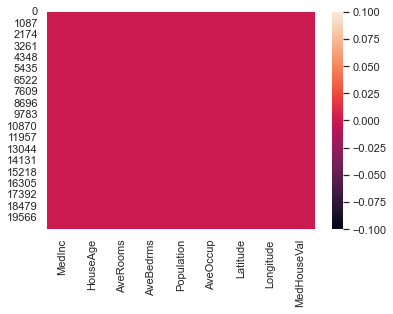

In [26]:
#heatmap for missing values
sns.heatmap(df.isnull())

There is no missing values here.

In [32]:
#Standadization of the dataset
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

scaler_y = StandardScaler()

#make y 2d
Y = pd.DataFrame(Y)          
Y_scaled = scaler_y.fit_transform(Y)
Y_scaled = pd.DataFrame(Y_scaled, columns=Y.columns)

# put them back together
df_scaled = pd.concat(
    [X_scaled.reset_index(drop=True), Y_scaled.reset_index(drop=True)],
    axis=1
)

df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [33]:
#Checking the standardization
# Means of each column (should be very close to 0)
print("Means after scaling:\n", df_scaled.mean())

# Standard deviations (should be very close to 1)
print("\nStandard deviations after scaling:\n", df_scaled.std())


Means after scaling:
 MedInc         3.734255e-16
HouseAge       8.557001e-16
AveRooms       2.704111e-16
AveBedrms     -1.531384e-16
Population    -6.465442e-17
AveOccup       6.064808e-19
Latitude       1.256263e-15
Longitude     -6.527810e-15
MedHouseVal    1.466140e-15
dtype: float64

Standard deviations after scaling:
 MedInc         1.000024
HouseAge       1.000024
AveRooms       1.000024
AveBedrms      1.000024
Population     1.000024
AveOccup       1.000024
Latitude       1.000024
Longitude      1.000024
MedHouseVal    1.000024
dtype: float64


In [34]:
#Checking duplicated values
df_scaled.duplicated().sum()

0

In [36]:
#Checking for datatypes
numerical_columns = df_scaled.select_dtypes(["number"]).columns.tolist()
numerical_columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

All of the variables are Numerical.

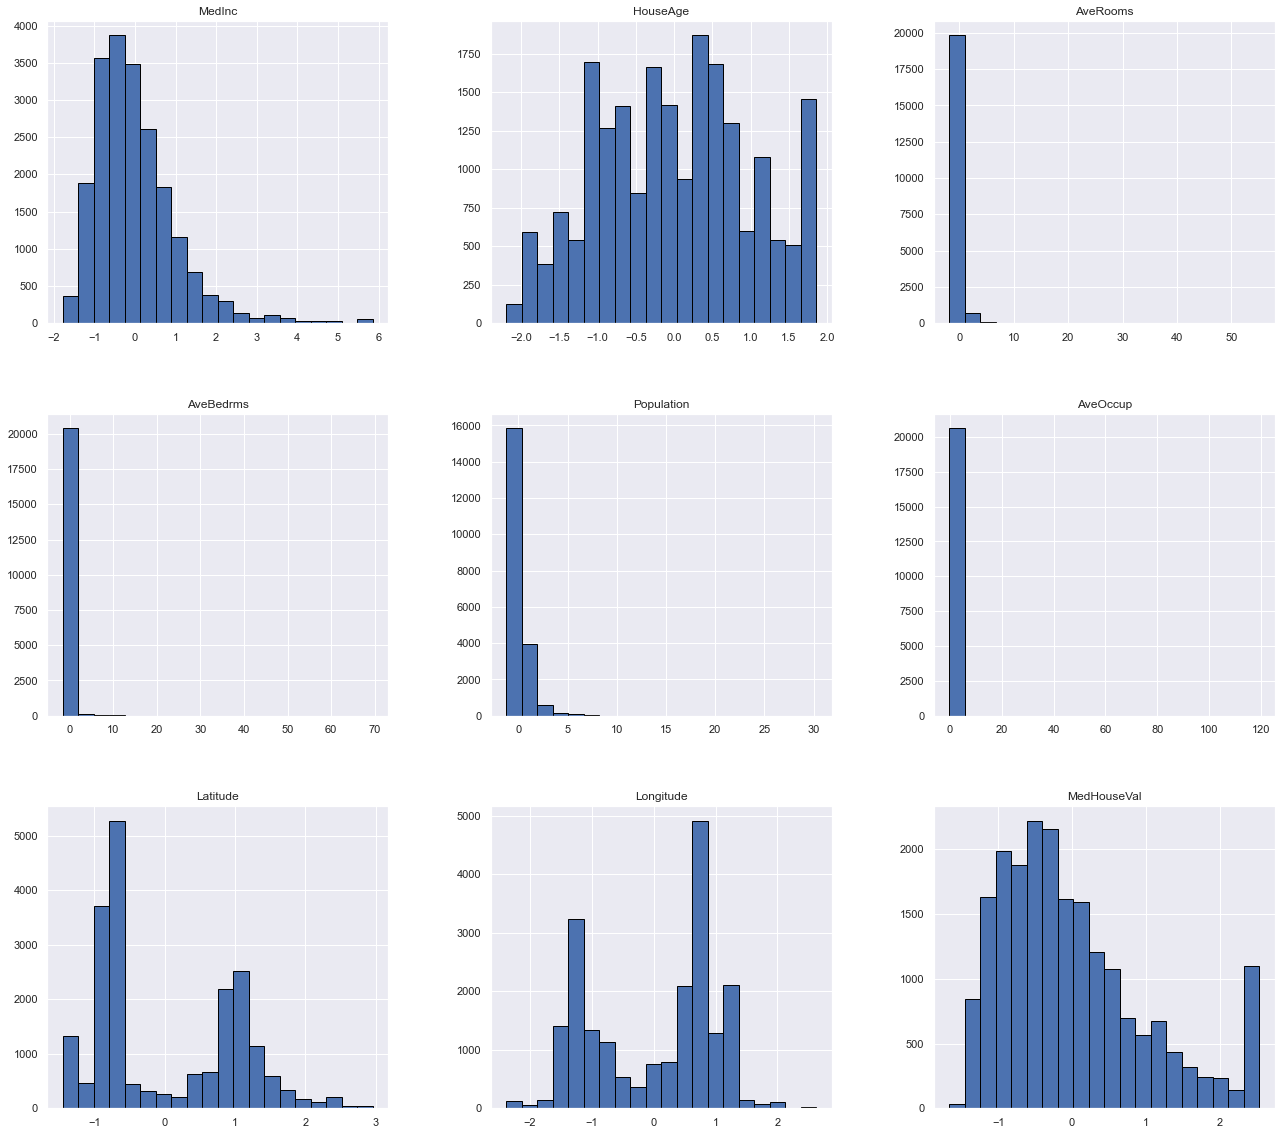

In [41]:
#histogram
df_scaled[numerical_columns].hist(figsize=(22, 20), bins=20, edgecolor="black")
plt.show()

MedInc: clearly right skewed, not normal. Few high income tracts pull the tail.

HouseAge: slightly right skewed with mild clustering by bands. Not normal.

AveRooms: strongly right skewed with long upper tail and outliers. Not normal.

AveBedrms: right skewed, mirrors AveRooms, narrow core. Not normal.

Population: heavily right skewed with a very long tail. Not normal.

AveOccup: very right skewed with extreme outliers. Not normal.

Latitude: multimodal and bounded by geography. Not normal.

Longitude: multimodal with coastal clusters. Not normal.

<AxesSubplot:>

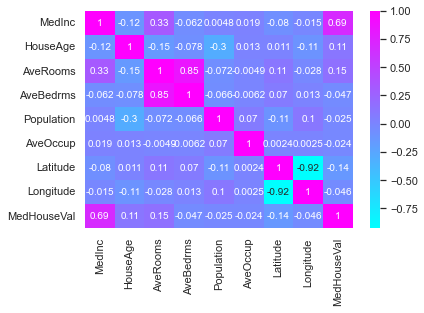

In [45]:
#correlation heatmap
sns.heatmap(df_scaled.corr(),cmap='cool',annot=True)

- MedInc — positive with MedHouseVal and AveRooms; weak negative with HouseAge, AveBedrms, Longitude.
- HouseAge — slight positive with MedHouseVal and AveBedrms; slight negative with AveRooms and Population.
- AveRooms — positive with AveBedrms and MedInc; weak negative with HouseAge and AveOccup.
- AveBedrms — positive with AveRooms and HouseAge; negative with MedInc and MedHouseVal.
- Population — no meaningful correlations; near-zero with others.
- AveOccup — mostly uncorrelated; weak negative with MedHouseVal and MedInc.
- Latitude — strongly negative with Longitude; weak positive with MedInc; weak negative with MedHouseVal.
- Longitude — strongly negative with Latitude; weak negative with MedInc and MedHouseVal.
- MedHouseVal — positive with MedInc (dominant) and HouseAge; weak negative with AveBedrms, AveOccup, Latitude, and Longitude.

In [57]:
#outliers count for numerical columns
# Detecting and printing outliers for each numeric column using the IQR method
for col in numerical_columns:
    Q1 = df_scaled[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_scaled[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper limit for outliers
    
# Filtering outliers
    outliers = df_scaled[(df_scaled[col] < lower_bound) | df_scaled[col] > upper_bound]
        
# Printing outliers count for each column
    outliers_count = outliers.shape[0]  # Count of outliers
    print(f"Number of outliers in {col}: {outliers_count}")
    

Number of outliers in MedInc: 0
Number of outliers in HouseAge: 0
Number of outliers in AveRooms: 0
Number of outliers in AveBedrms: 20640
Number of outliers in Population: 0
Number of outliers in AveOccup: 20640
Number of outliers in Latitude: 0
Number of outliers in Longitude: 0
Number of outliers in MedHouseVal: 0


IQR flags almost every row in AveBedrms and AveOccup due to natural skew, not errors, so dropping would wipe out data and bias the model. So we're keeping them.

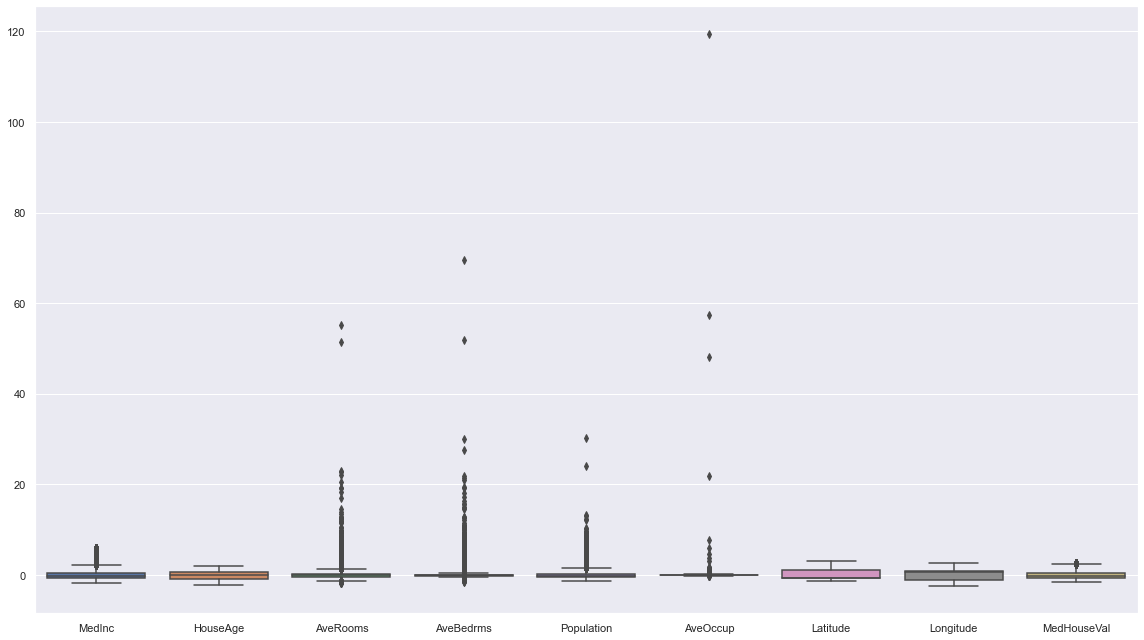

In [61]:
#boxplot 
plt.figure(figsize=(16, 9))
sns.boxplot(data=df_scaled[numerical_columns], orient='v')
plt.tight_layout()

Extreme high-end outliers dominate AveBedrms, AveOccup. Population, and AveRooms are compact within whiskers.

### Model and Evaluation

In [73]:
#Import Library
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [68]:
#Split the dataset
X = df_scaled.drop(columns=['MedHouseVal'])
y = df_scaled['MedHouseVal'] 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

In [71]:
#K-fold setup with cv 5 
kf5 = KFold(n_splits=5, shuffle=True)

In [74]:
#linear regression baseline
lr = LinearRegression()

# 5-fold CV on train part
lr_cv_r2   = cross_val_score(lr, X_train, y_train, cv=kf5, scoring='r2').mean()
lr_cv_rmse = -cross_val_score(lr, X_train, y_train, cv=kf5, scoring='neg_root_mean_squared_error').mean()

# fit on train part and evaluate on test part
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_test_r2   = r2_score(y_test, lr_pred)
lr_test_rmse = mean_squared_error(y_test, lr_pred, squared=False)
lr_test_mae  = mean_absolute_error(y_test, lr_pred)

print('LinearRegression | CV R2:', lr_cv_r2, '| CV RMSE:', lr_cv_rmse)
print('LinearRegression | Test R2:', lr_test_r2, '| Test RMSE:', lr_test_rmse, '| Test MAE:', lr_test_mae)

LinearRegression | CV R2: 0.5097616468942101 | CV RMSE: 0.6300802267280033
LinearRegression | Test R2: 0.6005209759428523 | Test RMSE: 0.6336199612981159 | Test MAE: 0.45859598011577607


In [75]:
#sgd regression with ridge penalty
sgd_ridge = SGDRegressor(loss='squared_error', max_iter=5000, tol=1e-4)

grid_ridge = {
    'penalty': ['l2'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept': [True, False],
    'eta0': [0.1, 0.01, 0.001]
}

gs_ridge = GridSearchCV(
    estimator=sgd_ridge,
    param_grid=grid_ridge,
    scoring='neg_root_mean_squared_error',
    cv=kf5,
    n_jobs=-1
)
gs_ridge.fit(X_train, y_train)
ridge_best = gs_ridge.best_estimator_

# CV with the best model
ridge_cv_r2   = cross_val_score(ridge_best, X_train, y_train, cv=kf5, scoring='r2').mean()
ridge_cv_rmse = -cross_val_score(ridge_best, X_train, y_train, cv=kf5, scoring='neg_root_mean_squared_error').mean()

# Test set
ridge_pred = ridge_best.predict(X_test)
ridge_test_r2   = r2_score(y_test, ridge_pred)
ridge_test_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_test_mae  = mean_absolute_error(y_test, ridge_pred)

print('Ridge SGD | best params:', gs_ridge.best_params_)
print('Ridge SGD | CV R2:', ridge_cv_r2, '| CV RMSE:', ridge_cv_rmse)
print('Ridge SGD | Test R2:', ridge_test_r2, '| Test RMSE:', ridge_test_rmse, '| Test MAE:', ridge_test_mae)


Ridge SGD | best params: {'alpha': 0.0001, 'eta0': 0.001, 'fit_intercept': False, 'penalty': 'l2'}
Ridge SGD | CV R2: 0.6013959258936825 | CV RMSE: 0.6313366016140914
Ridge SGD | Test R2: 0.5988013796884936 | Test RMSE: 0.6349822361898595 | Test MAE: 0.4588720254417724


In [76]:
#sgd regression with elastic net penalty
sgd_en = SGDRegressor(loss='squared_error', max_iter=5000, tol=1e-4)

grid_en = {
    'penalty': ['elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept': [True, False],
    'eta0': [0.1, 0.01, 0.001]
    # add 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] only if your notebook tuned it
}

gs_en = GridSearchCV(
    estimator=sgd_en,
    param_grid=grid_en,
    scoring='neg_root_mean_squared_error',
    cv=kf5,
    n_jobs=-1
)
gs_en.fit(X_train, y_train)
en_best = gs_en.best_estimator_

# CV with the best model
en_cv_r2   = cross_val_score(en_best, X_train, y_train, cv=kf5, scoring='r2').mean()
en_cv_rmse = -cross_val_score(en_best, X_train, y_train, cv=kf5, scoring='neg_root_mean_squared_error').mean()

# Test set
en_pred = en_best.predict(X_test)
en_test_r2   = r2_score(y_test, en_pred)
en_test_rmse = mean_squared_error(y_test, en_pred, squared=False)
en_test_mae  = mean_absolute_error(y_test, en_pred)

print('ElasticNet SGD | best params:', gs_en.best_params_)
print('ElasticNet SGD | CV R2:', en_cv_r2, '| CV RMSE:', en_cv_rmse)
print('ElasticNet SGD | Test R2:', en_test_r2, '| Test RMSE:', en_test_rmse, '| Test MAE:', en_test_mae)


ElasticNet SGD | best params: {'alpha': 0.001, 'eta0': 0.001, 'fit_intercept': True, 'penalty': 'elasticnet'}
ElasticNet SGD | CV R2: 0.6021505662169241 | CV RMSE: 0.6671770184344219
ElasticNet SGD | Test R2: 0.5989446372717127 | Test RMSE: 0.6348688582546081 | Test MAE: 0.4581080496717457


In [82]:
#accuracy 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# 5-fold CV accuracy (R²) on TRAIN
cv_pred_lr  = cross_val_predict(lr, X_train, y_train, cv=5)
cv_acc_lr   = metrics.r2_score(y_train, cv_pred_lr)

cv_acc_ridge = cross_val_score(ridge_best, X_train, y_train, cv=5, scoring='r2').mean()
cv_acc_en    = cross_val_score(en_best,   X_train, y_train, cv=5, scoring='r2').mean()

# TEST accuracy (R²) — fit once, predict once
test_acc_lr    = metrics.r2_score(y_test, lr.fit(X_train, y_train).predict(X_test))
test_acc_ridge = metrics.r2_score(y_test, ridge_best.fit(X_train, y_train).predict(X_test))
test_acc_en    = metrics.r2_score(y_test, en_best.fit(X_train, y_train).predict(X_test))

print("LinearRegression :", test_acc_lr )
print("SGD Ridge :", test_acc_ridge )
print("SGD ElasticNet :", test_acc_en)


LinearRegression : 0.6005209759428523
SGD Ridge : 0.5972687836737216
SGD ElasticNet : 0.5981141412714159


In [83]:
#comaprison table
summary = pd.DataFrame([
    ['LinearRegression', lr_cv_r2,   lr_cv_rmse,   lr_test_r2,   lr_test_rmse,   lr_test_mae],
    ['SGD Ridge (L2)',  ridge_cv_r2, ridge_cv_rmse, ridge_test_r2, ridge_test_rmse, ridge_test_mae],
    ['SGD ElasticNet',  en_cv_r2,    en_cv_rmse,    en_test_r2,    en_test_rmse,    en_test_mae],
], columns=['Model','CV_R2','CV_RMSE','Test_R2','Test_RMSE','Test_MAE']).round(3)

display(summary)


,Model,CV_R2,CV_RMSE,Test_R2,Test_RMSE,Test_MAE
0,LinearRegression,0.510,0.630,0.601,0.634,0.459
1,SGD Ridge (L2),0.601,0.631,0.599,0.635,0.459
2,SGD ElasticNet,0.602,0.667,0.599,0.635,0.458


Regularization didn’t improve generalization here; the plain LinearRegression is marginally best and simplest. We can use Ridge/Elastic Net only if we want coefficient shrinkage/stability, not for accuracy gains on this dataset.